In [55]:
import csv
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import euclidean, cityblock

# Función para cargar el archivo .data
def cargar_iris_df_data(filepath):
    data = []
    with open(filepath, 'r') as file:
        reader = csv.reader(file)
        for row in reader:
            if row:  # Ignorar filas vacías
                # Convertir características numéricas a float y agregar especie como string
                data.append([float(x) for x in row[:-1]] + [row[-1]])
    return data

# Ruta al archivo .data
filepath = 'iris.data'

# Cargar el archivo .data
iris_df_data = cargar_iris_df_data(filepath)

# Convertir a DataFrame de pandas
iris_df = pd.DataFrame(iris_df_data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

----------------------Promedios para cada especie--------------------
                 sepal_length  sepal_width  petal_length  petal_width
species                                                              
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026
-----------Distancia Manhattan entre cada par de promedios:-----------
[[0.    5.456 7.896]
 [5.456 0.    2.848]
 [7.896 2.848 0.   ]]
-----------Distancia Euclidean entre cada par de promedios:-----------
[[0.         3.20517457 4.75259171]
 [3.20517457 0.         1.62048882]
 [4.75259171 1.62048882 0.        ]]


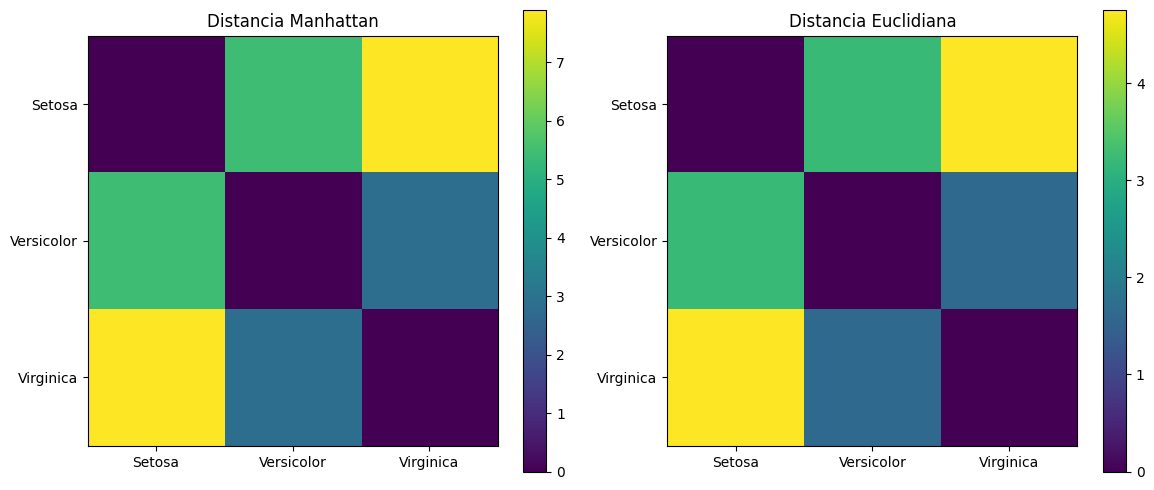

In [56]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
import matplotlib.pyplot as plt

# Calcular los promedios de las medidas de las flores para cada especie
avg_measurements = iris_df.groupby('species').mean()
print("----------------------Promedios para cada especie--------------------")
print(avg_measurements)

# Calcular las distancias Manhattan y Euclidiana entre cada par de promedios
dist_manhattan = distance.cdist(avg_measurements, avg_measurements, metric='cityblock')
dist_euclidean = distance.cdist(avg_measurements, avg_measurements, metric='euclidean')

print ("-----------Distancia Manhattan entre cada par de promedios:-----------")
print(dist_manhattan)
print ("-----------Distancia Euclidean entre cada par de promedios:-----------")
print(dist_euclidean)
# Graficar las distancias de cada par de promedios
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.imshow(dist_manhattan, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Distancia Manhattan')
plt.xticks(ticks=[0, 1, 2], labels=['Setosa', 'Versicolor', 'Virginica'])
plt.yticks(ticks=[0, 1, 2], labels=['Setosa', 'Versicolor', 'Virginica'])

plt.subplot(1, 2, 2)
plt.imshow(dist_euclidean, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Distancia Euclidiana')
plt.xticks(ticks=[0, 1, 2], labels=['Setosa', 'Versicolor', 'Virginica'])
plt.yticks(ticks=[0, 1, 2], labels=['Setosa', 'Versicolor', 'Virginica'])

plt.tight_layout()
plt.show()

<ipython-input-57-79fd9243abf7>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(group['petal_length'], group['petal_width'], label=species, cmap='viridis')
<ipython-input-57-79fd9243abf7>:39: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(group['petal_length'], group['petal_width'], label=species, cmap='viridis')
<ipython-input-57-79fd9243abf7>:57: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(group['sepal_length'], group['sepal_width'], label=species, cmap='viridis')
<ipython-input-57-79fd9243abf7>:75: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(group['sepal_length'], group['sepal_width'], label=species, cmap='viridis')


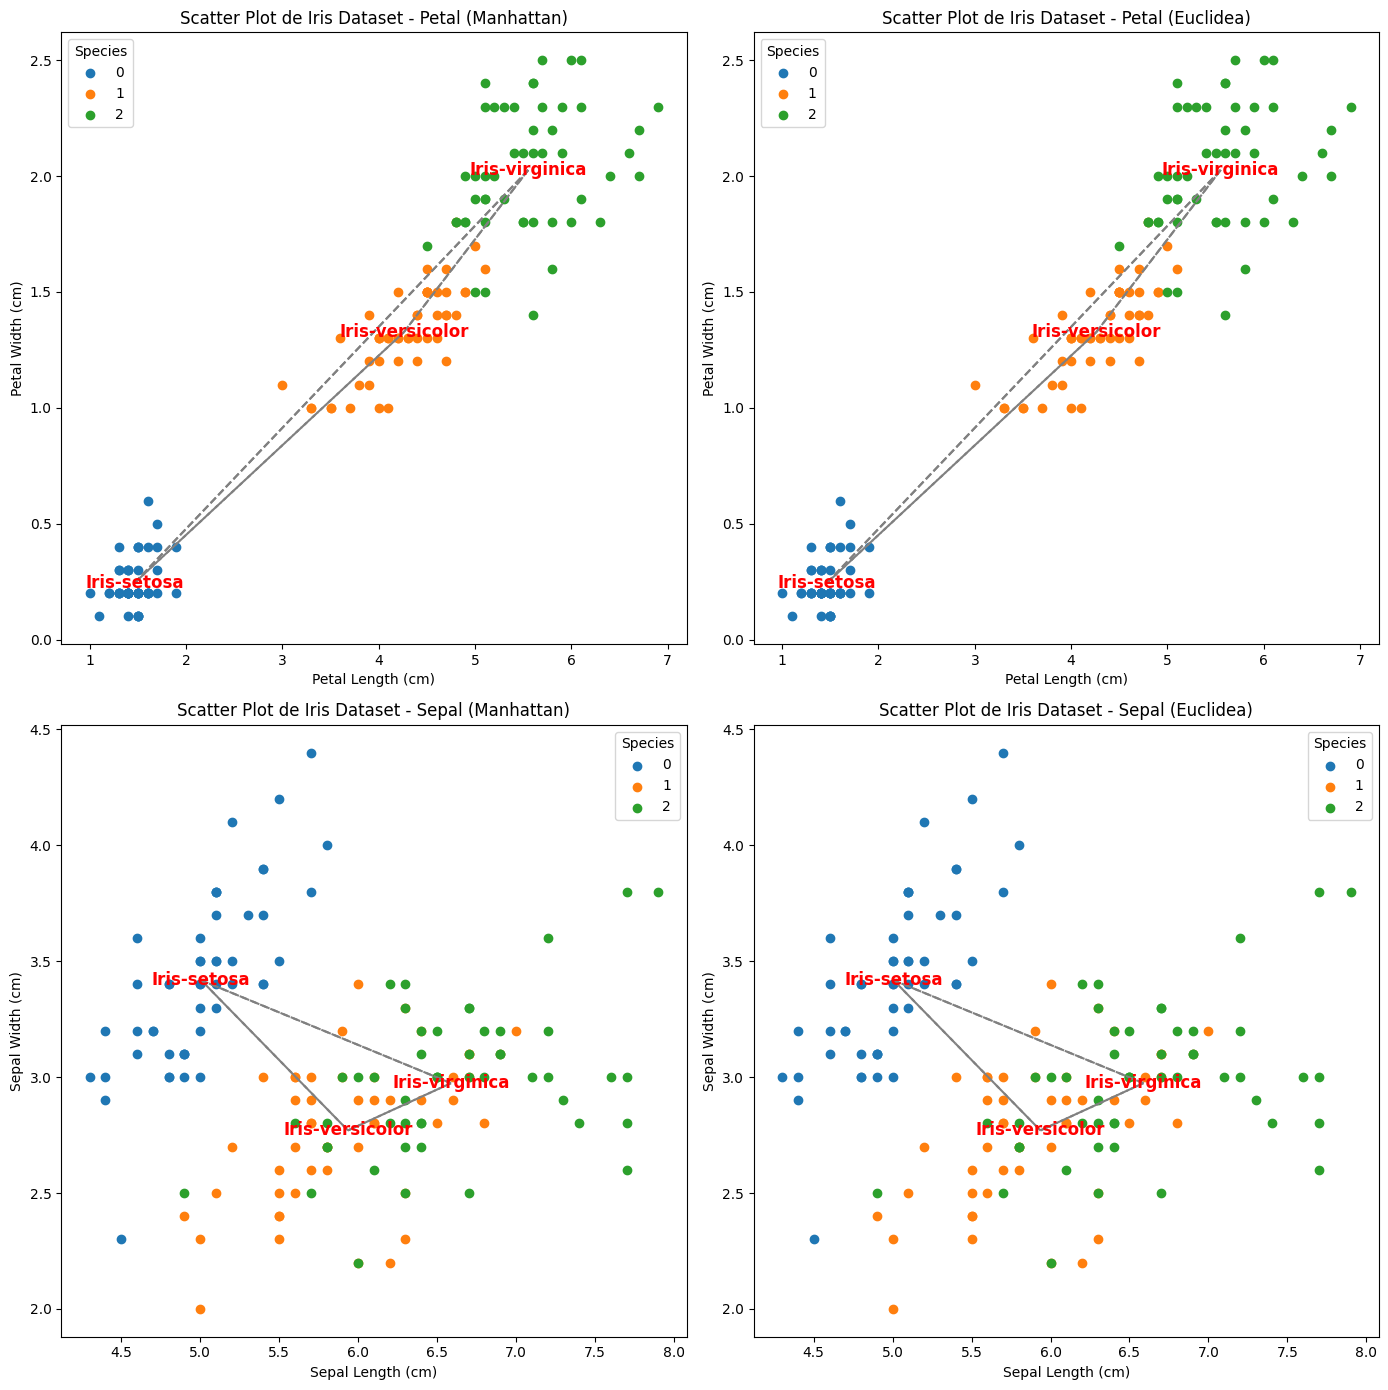

In [57]:
#Reemplazar nombres de especies con números para facilitar el cálculo
species_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
iris_df['species'] = iris_df['species'].map(species_mapping)


# Calcular las distancias Manhattan y Euclidea entre cada par de promedios
dist_manhattan_petal = distance.cdist(avg_measurements[['petal_length', 'petal_width']], avg_measurements[['petal_length', 'petal_width']], metric='cityblock')
dist_euclidean_petal = distance.cdist(avg_measurements[['petal_length', 'petal_width']], avg_measurements[['petal_length', 'petal_width']], metric='euclidean')

dist_manhattan_sepal = distance.cdist(avg_measurements[['sepal_length', 'sepal_width']], avg_measurements[['sepal_length', 'sepal_width']], metric='cityblock')
dist_euclidean_sepal = distance.cdist(avg_measurements[['sepal_length', 'sepal_width']], avg_measurements[['sepal_length', 'sepal_width']], metric='euclidean')

# Crear subplots
plt.figure(figsize=(14, 14))

# Scatter Plot con líneas - Petal y Manhattan
plt.subplot(2, 2, 1)
for species, group in iris_df.groupby('species'):
    plt.scatter(group['petal_length'], group['petal_width'], label=species, cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Scatter Plot de Iris Dataset - Petal (Manhattan)')
plt.legend(title='Species')

# Líneas para los promedios de cada especie y distancias Manhattan
for i in range(3):
    for j in range(3):
        plt.plot([avg_measurements.iloc[i]['petal_length'], avg_measurements.iloc[j]['petal_length']],
                 [avg_measurements.iloc[i]['petal_width'], avg_measurements.iloc[j]['petal_width']],
                 linestyle='--', color='gray')
    plt.text(avg_measurements.iloc[i]['petal_length'], avg_measurements.iloc[i]['petal_width'],
             list(species_mapping.keys())[list(species_mapping.values()).index(i)], ha='center', va='center', fontsize=12, color='red', weight='bold')

# Scatter Plot con líneas - Petal y Euclidea
plt.subplot(2, 2, 2)
for species, group in iris_df.groupby('species'):
    plt.scatter(group['petal_length'], group['petal_width'], label=species, cmap='viridis')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Scatter Plot de Iris Dataset - Petal (Euclidea)')
plt.legend(title='Species')

# Líneas para los promedios de cada especie y distancias Euclideas
for i in range(3):
    for j in range(3):
        plt.plot([avg_measurements.iloc[i]['petal_length'], avg_measurements.iloc[j]['petal_length']],
                 [avg_measurements.iloc[i]['petal_width'], avg_measurements.iloc[j]['petal_width']],
                 linestyle='--', color='gray')
    plt.text(avg_measurements.iloc[i]['petal_length'], avg_measurements.iloc[i]['petal_width'],
             list(species_mapping.keys())[list(species_mapping.values()).index(i)], ha='center', va='center', fontsize=12, color='red', weight='bold')

# Scatter Plot con líneas - Sepal y Manhattan
plt.subplot(2, 2, 3)
for species, group in iris_df.groupby('species'):
    plt.scatter(group['sepal_length'], group['sepal_width'], label=species, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot de Iris Dataset - Sepal (Manhattan)')
plt.legend(title='Species')

# Líneas para los promedios de cada especie y distancias Manhattan
for i in range(3):
    for j in range(3):
        plt.plot([avg_measurements.iloc[i]['sepal_length'], avg_measurements.iloc[j]['sepal_length']],
                 [avg_measurements.iloc[i]['sepal_width'], avg_measurements.iloc[j]['sepal_width']],
                 linestyle='--', color='gray')
    plt.text(avg_measurements.iloc[i]['sepal_length'], avg_measurements.iloc[i]['sepal_width'],
             list(species_mapping.keys())[list(species_mapping.values()).index(i)], ha='center', va='center', fontsize=12, color='red', weight='bold')

# Scatter Plot con líneas - Sepal y Euclidea
plt.subplot(2, 2, 4)
for species, group in iris_df.groupby('species'):
    plt.scatter(group['sepal_length'], group['sepal_width'], label=species, cmap='viridis')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Scatter Plot de Iris Dataset - Sepal (Euclidea)')
plt.legend(title='Species')

# Líneas para los promedios de cada especie y distancias Euclideas
for i in range(3):
    for j in range(3):
        plt.plot([avg_measurements.iloc[i]['sepal_length'], avg_measurements.iloc[j]['sepal_length']],
                 [avg_measurements.iloc[i]['sepal_width'], avg_measurements.iloc[j]['sepal_width']],
                 linestyle='--', color='gray')
    plt.text(avg_measurements.iloc[i]['sepal_length'], avg_measurements.iloc[i]['sepal_width'],
             list(species_mapping.keys())[list(species_mapping.values()).index(i)], ha='center', va='center', fontsize=12, color='red', weight='bold')

plt.tight_layout()
plt.show()

## **Consulta:** <br>
**1. Puede un modelo agrupar datos con base en estas medidas?** <br>
 Si <br>
**2. ¿Si no se tuviese la especie de la flor como dato en el dataset, se podría encontrar cuántas especies existen?** <br>
Si, a través de la agrupación de los datos y las distancias entre datos<br>
**3.¿Cómo se emplearía la medida de distancia para ese fin?** <br>
Creo que sería dependiendo los datos que esten más cercanos unos entre otros

